# Accessing Argo data by date using Argopy

<img src="https://raw.githubusercontent.com/euroargodev/argopy/master/docs/_static/argopy_logo_long.png" alt="argopy" width="200"/> also allows to download and represente the data by date. In this notebook we show a few examples, but we refer to the [argopy Gallery](https://argopy.readthedocs.io/en/latest/gallery.html) for a more detailled explanation

Fist, as usual, import the libraries:

In [38]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

import xarray as xr
xr.set_options(display_expand_attrs = False)

Import argopy and set-up a data fetcher:

In [2]:
import argopy
argopy.reset_options()
argopy.clear_cache()

from argopy import DataFetcher  # This is the class to work with Argo data
from argopy.plot import scatter_map, scatter_plot  # Functions to easily make maps and plots

You can load profiles for a specific date (and domain) using the ``region`` access point and specificating the region (-180, 180, -90, 90), the depth range (0, 100) and the date range ('2020-11-11', '2020-11-12')

In [4]:
ArgoSet=DataFetcher().region([-180, 180, -90, 90, 0, 100, '2020-11-11', '2020-11-12'])

In [6]:
ArgoSet

<datafetcher.erddap>
Name: Ifremer erddap Argo data fetcher for a space/time region
API: https://erddap.ifremer.fr/erddap
Domain: [x=-180.00/180.00; y=-90.00/90 ... 00.0; t=2020-11-11/2020-11-12]
Performances: cache=False, parallel=False
User mode: standard
Dataset: phy

In [7]:
apDS=ArgoSet.load().data

/Users/pvb/miniconda3/envs/AOS_clean/lib/python3.12/site-packages/argopy/xarray.py:70: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self._dims = list(xarray_obj.dims.keys())
/Users/pvb/miniconda3/envs/AOS_clean/lib/python3.12/site-packages/argopy/xarray.py:70: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self._dims = list(xarray_obj.dims.keys())
/Users/pvb/miniconda3/envs/AOS_clean/lib/python3.12/site-packages/argopy/xarray.py:70: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.d

In [8]:
apDS

<xarray.Dataset> Size: 2MB
Dimensions:          (N_POINTS: 20192)
Coordinates:
  * N_POINTS         (N_POINTS) int64 162kB 0 1 2 3 ... 20188 20189 20190 20191
    LATITUDE         (N_POINTS) float64 162kB 35.14 35.14 ... -25.59 -25.59
    LONGITUDE        (N_POINTS) float64 162kB 15.69 15.69 15.69 ... 168.6 168.6
    TIME             (N_POINTS) datetime64[ns] 162kB 2020-11-11T00:08:20 ... ...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 162kB 103 103 103 103 ... 121 121 121 121
    DATA_MODE        (N_POINTS) <U1 81kB 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 81kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 162kB 6903788 6903788 ... 5905204 5905204
    POSITION_QC      (N_POINTS) int64 162kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 81kB 2.9 3.9 5.1 ... 95.96 97.96 99.96
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 81kB 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_QC          (N_POINTS) int64 162kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 81kB 22.01 22.02 22.01 ... 20.37 20.36
    TEMP_ERROR       (N_POINTS) float32 81kB 0.002 0.002 0.002 ... 0.002 0.002
    TEMP_QC          (N_POINTS) int64 162kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 162kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes: (8)

note that the data is organized in 'points', a 1D array collection of measurements:

In [12]:
apDS.TEMP

<xarray.DataArray 'TEMP' (N_POINTS: 20192)> Size: 81kB
array([22.014, 22.017, 22.012, ..., 20.382, 20.37 , 20.359], dtype=float32)
Coordinates:
  * N_POINTS   (N_POINTS) int64 162kB 0 1 2 3 4 ... 20188 20189 20190 20191
    LATITUDE   (N_POINTS) float64 162kB 35.14 35.14 35.14 ... -25.59 -25.59
    LONGITUDE  (N_POINTS) float64 162kB 15.69 15.69 15.69 ... 168.6 168.6 168.6
    TIME       (N_POINTS) datetime64[ns] 162kB 2020-11-11T00:08:20 ... 2020-1...
Attributes: (7)

However, and for the purpose of the Argo online school is easier to work with the data in [profiles](https://euroargodev.github.io/argoonlineschool/Lessons/L01_TheArgoProgram/Chapter14_OceanographicProfile.html); argopy allows the transformation:

In [13]:
data=apDS.argo.point2profile()
data

/Users/pvb/miniconda3/envs/AOS_clean/lib/python3.12/site-packages/argopy/xarray.py:70: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self._dims = list(xarray_obj.dims.keys())


<xarray.Dataset> Size: 997kB
Dimensions:          (N_PROF: 399, N_LEVELS: 100)
Coordinates:
  * N_PROF           (N_PROF) int64 3kB 377 245 308 118 213 ... 176 25 183 239
  * N_LEVELS         (N_LEVELS) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    LATITUDE         (N_PROF) float64 3kB 35.14 -21.1 -45.69 ... -15.29 -25.59
    LONGITUDE        (N_PROF) float64 3kB 15.69 -125.9 136.7 ... -135.0 168.6
    TIME             (N_PROF) datetime64[ns] 3kB 2020-11-11T00:08:20 ... 2020...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 3kB 103 111 27 100 146 7 ... 9 10 68 189 121
    DATA_MODE        (N_PROF) <U1 2kB 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 2kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 3kB 6903788 5905256 ... 5902419 5905204
    POSITION_QC      (N_PROF) int64 3kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 160kB 2.9 3.9 5.1 ... nan nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 160kB 0.01 0.01 0.01 ... nan nan
    PSAL_QC          (N_PROF) int64 3kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 160kB 22.01 22.02 ... nan nan
    TEMP_ERROR       (N_PROF, N_LEVELS) float32 160kB 0.002 0.002 ... nan nan
    TEMP_QC          (N_PROF) int64 3kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 3kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (8)

and we can plot all the profiles measured during this month:

/Users/pvb/miniconda3/envs/AOS_clean/lib/python3.12/site-packages/argopy/plot/plot.py:409: UserWarning: More than one N_LEVELS found in this dataset, scatter_map will use the first level only
  warnings.warn("More than one N_LEVELS found in this dataset, scatter_map will use the first level only")


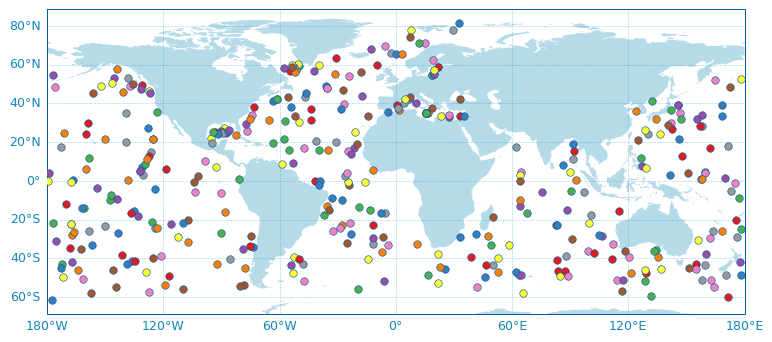

In [18]:
scatter_map(data,legend = False);

We can look at the upper 10db temperature values:

In [34]:
temp = apDS.where(apDS['PRES']<10)['TEMP']

In [36]:
lon=temp.LONGITUDE
lat=temp.LATITUDE

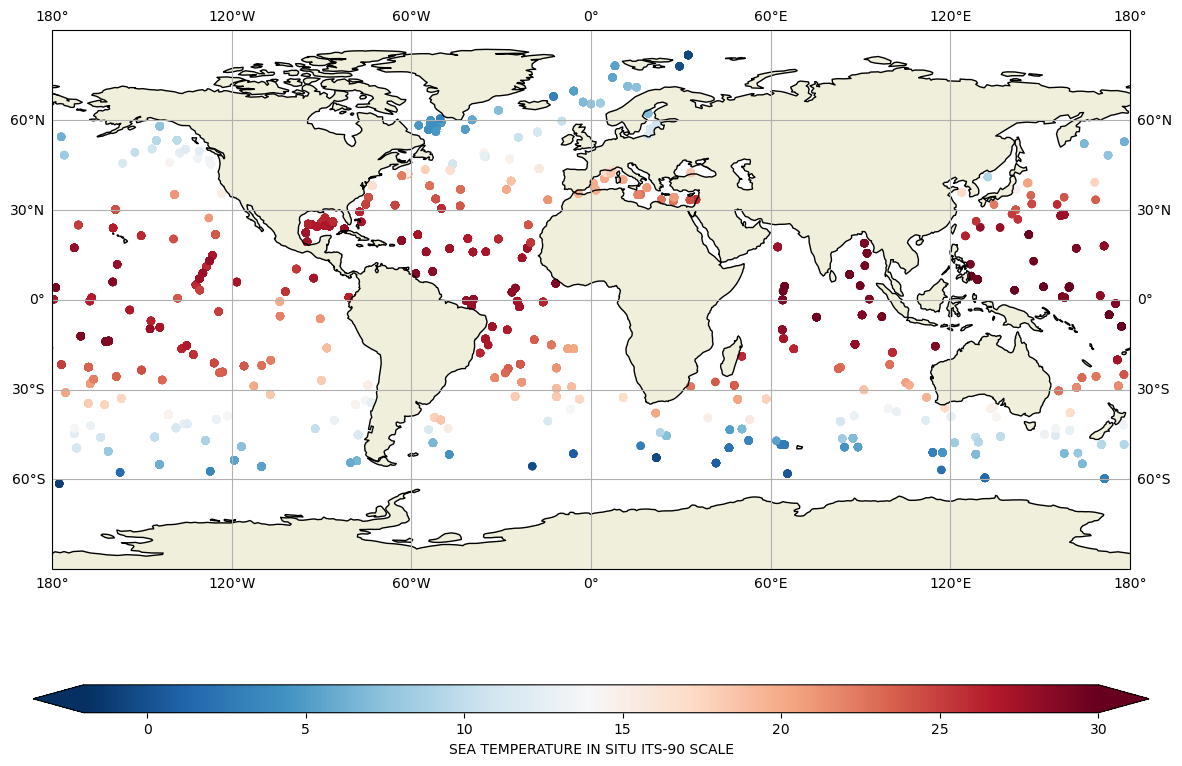

In [39]:
fig,ax = plt.subplots(figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# data for each basin
cs=ax.scatter(lon,lat,c=temp,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

#colorbar
cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(temp.long_name)